# Pre processing

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Loading train and test data

In [2]:
data_train = pd.read_csv("mnist_train.csv")
data_test = pd.read_csv("mnist_test.csv")

In [3]:
data_train.head()

,5,0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,...,0.608,0.609,0.610,0.611,0.612,0.613,0.614,0.615,0.616,0.617
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### Spliting labels and pixels value

In [4]:
y_train = data_train.iloc[:,0]
X_train = data_train.iloc[:,1:]

y_test = data_test.iloc[:,0]
X_test = data_test.iloc[:,1:]

### Ans 5. Generating some examples 

In [5]:
def plot_image(X_train, y_train, i):
    image = X_train.iloc[i].values.reshape(28,28)
    plt.imshow(image)
    plt.title(f"Label : {y_train.iloc[i]}")
    plt.axis('off')
    plt.show()

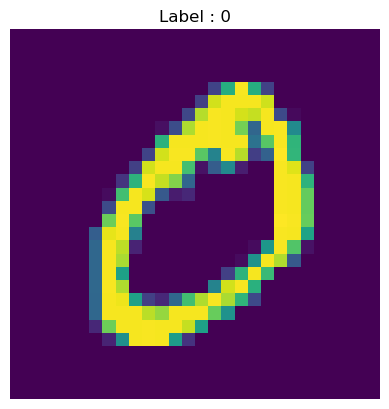

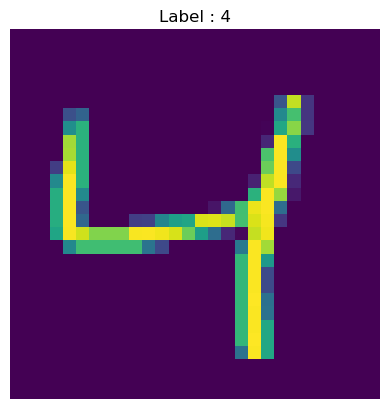

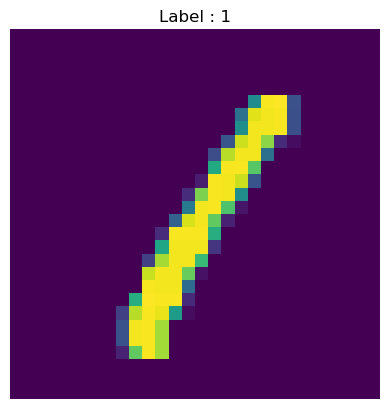

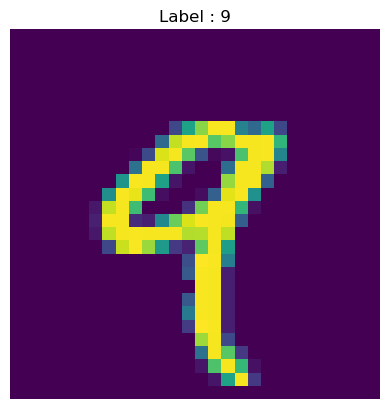

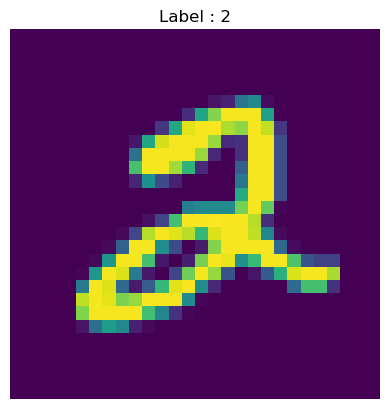

In [6]:
for i in range(5):
    plot_image(X_train, y_train, i)

### Converting data into numpy array and normalizing the input image

In [7]:
X_train = np.array(X_train)/255
y_train = np.array(y_train)

X_test = np.array(X_test)/255
y_test = np.array(y_test)

print(X_train.shape)

(59999, 784)


# Ans 7. Using the obtained algorithm to train a multi-class logistic regression classifier

In [8]:
def softmax(beta,x):
    
    # Taking dot product between β and xi
    z = np.dot(beta,x)
    e_x = np.exp(z - np.max(z))
    
    # Using Softmax equation as provided in the project report
    softmax = e_x/1+e_x.sum()
    
    # Normalizing the softmax values
    softmax = softmax/np.max(softmax)
    
    return softmax

In [9]:
def compute_gradient(X,y,beta):
    
    m =X.shape[0]
    K = beta.shape[0]
    
    # Generating dumy data for gradient and setting shape same as of beta
    gradients = np.zeros_like(beta)
    
    for i in range(m):
        xi = X[i]
        yi = y[i]
        
        # Calculating probabilities
        probabilities = softmax(beta,xi)
        
        # Generating indicators which will be 1 if y = βk otherwise 0
        indicators = np.zeros(K)
        indicators[yi - 1] = 1
        
        
        indi_prob = indicators - probabilities
        gradients += np.outer(indi_prob,xi)
        
    return gradients

In [10]:
def gradient_ascent(X,y,X_test,y_test, beta, learning_rate=0.01, num_iterations = 30):
    
    cost_values = []
    train_accuracies = []
    test_accuracies = []
    
    beta_list = []
    
    for iter in range(num_iterations):
        
        gradients = compute_gradient(X,y,beta)
        beta += learning_rate * gradients
        
        # Computing log-likelihood
        log_likelihood = compute_log_likelihood(X,y,beta)
        cost_values.append(log_likelihood)
        
        # Computing training Accuracy
        train_accuracy = compute_accuracy(X,y,beta)
        train_accuracies.append(train_accuracy)
        
        # Computing testing accuracy
        test_accuracy = compute_accuracy(X_test,y_test,beta)
        test_accuracies.append(test_accuracy)
        
        print(f"Iteration {iter + 1}/{num_iterations}")
        
    return beta, cost_values, train_accuracies, test_accuracies

In [11]:
def compute_log_likelihood(X,y,beta):
    m = X.shape[0]
    K= beta.shape[0]
    log_likelihood = 0.0
    
    for i in range(m):
        xi = X[i]
        yi = y[i]
        
        probabilities = softmax(beta,xi)
    
        # Updating log_likelihood
        log_likelihood += np.log(probabilities[yi-1])
    return log_likelihood

In [12]:
def compute_accuracy(X,y,beta):
    
    m= X.shape[0]
    correct_predictions = 0
    
    for i in range(m):
        xi = X[i]
        yi = y[i]
        
        probabilities = softmax(beta,xi)
        predicted_label = np.argmax(probabilities) + 1
        
        if predicted_label ==yi:
            correct_predictions += 1
    
    return correct_predictions / m

In [13]:
K = 10 
d = X_train.shape[1]
beta = np.random.rand(K,d)
learning_rate=0.001
num_iterations = 100

optimized_beta, cost_values, train_accuracies, test_accuracies = gradient_ascent(X_train,y_train,X_test,y_test,beta,learning_rate, num_iterations)


Iteration 1/100
Iteration 2/100
Iteration 3/100
Iteration 4/100
Iteration 5/100
Iteration 6/100
Iteration 7/100
Iteration 8/100
Iteration 9/100
Iteration 10/100
Iteration 11/100
Iteration 12/100
Iteration 13/100
Iteration 14/100
Iteration 15/100
Iteration 16/100
Iteration 17/100
Iteration 18/100
Iteration 19/100
Iteration 20/100
Iteration 21/100
Iteration 22/100
Iteration 23/100
Iteration 24/100
Iteration 25/100
Iteration 26/100
Iteration 27/100
Iteration 28/100
Iteration 29/100
Iteration 30/100
Iteration 31/100
Iteration 32/100
Iteration 33/100
Iteration 34/100
Iteration 35/100
Iteration 36/100
Iteration 37/100
Iteration 38/100
Iteration 39/100
Iteration 40/100
Iteration 41/100
Iteration 42/100
Iteration 43/100
Iteration 44/100
Iteration 45/100
Iteration 46/100
Iteration 47/100
Iteration 48/100
Iteration 49/100
Iteration 50/100
Iteration 51/100
Iteration 52/100
Iteration 53/100
Iteration 54/100
Iteration 55/100
Iteration 56/100
Iteration 57/100
Iteration 58/100
Iteration 59/100
Iterat

# Cost value (log-likelihood) Vs  number of iterations

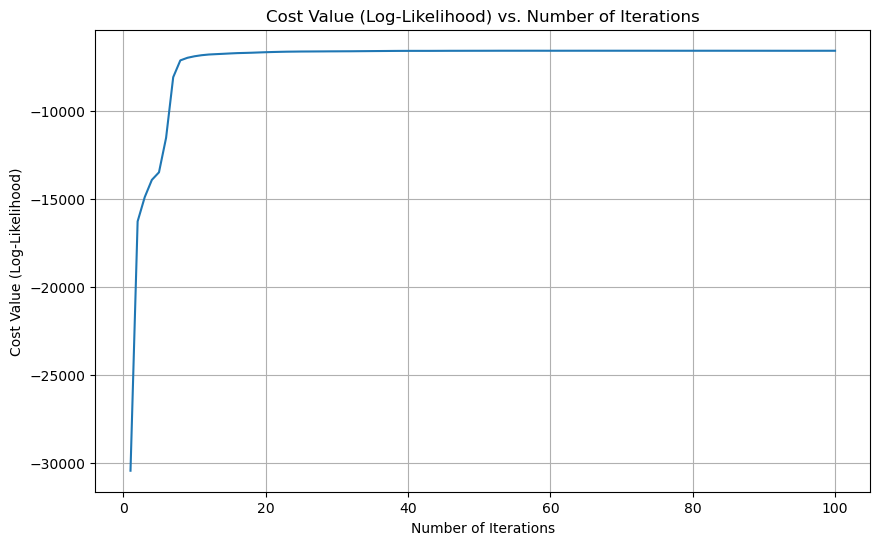

In [14]:

plt.figure(figsize=(10, 6))
plt.plot(range(1, 100 + 1), cost_values)
plt.xlabel('Number of Iterations')
plt.ylabel('Cost Value (Log-Likelihood)')
plt.title('Cost Value (Log-Likelihood) vs. Number of Iterations')
plt.grid(True)
plt.show()

##  Training accuracy & Testing accuracy Vs Number of iterations

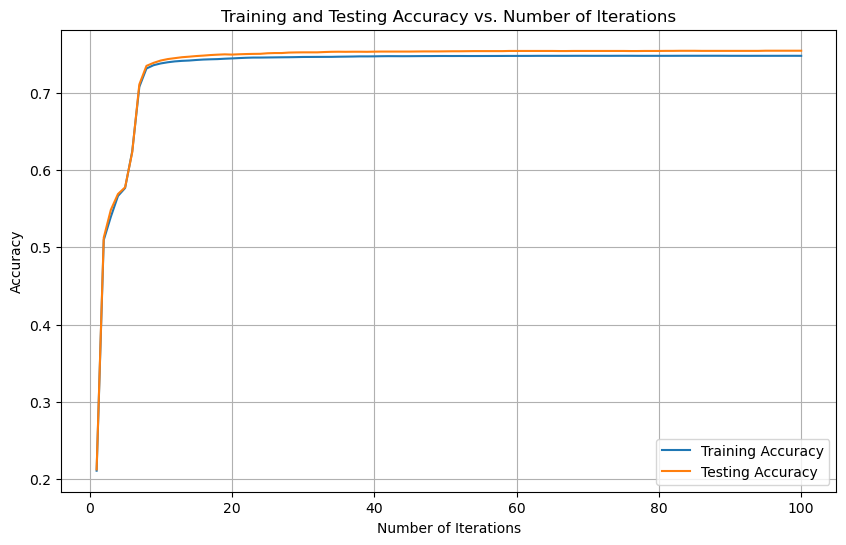

In [15]:

plt.figure(figsize=(10, 6))
plt.plot(range(1, 100 + 1), train_accuracies, label='Training Accuracy')
plt.plot(range(1, 100 + 1), test_accuracies, label='Testing Accuracy')
plt.xlabel('Number of Iterations')
plt.ylabel('Accuracy')
plt.title('Training and Testing Accuracy vs. Number of Iterations')
plt.legend()
plt.grid(True)
plt.show()

### Max accuracy obtained

In [16]:
final_test_accuracy = np.max(test_accuracies)
print(f"Final Testing Accuracy: {final_test_accuracy}")

Final Testing Accuracy: 0.7543754375437544


# Ans 8 Performing Regularization λ = 1,10,100,1000

In [17]:
def compute_gradient(X,y,beta, lambda_val):
    
    m =X.shape[0]
    K = beta.shape[0]
    
    gradients = np.zeros_like(beta)
    
    for i in range(m):
        xi = X[i]
        yi = y[i]
        
        probabilities = softmax(beta,xi)
        indicators = np.zeros(K)
        indicators[yi - 1] = 1
        
        
        indi_prob = indicators - probabilities
        gradients += np.outer(indi_prob,xi)
    
    gradients -= 2*lambda_val*beta
        
    return gradients

In [18]:
def gradient_ascent(X,y,X_test,y_test, beta,lambda_val, learning_rate, num_iterations):
    
    cost_values = []
    train_accuracies = []
    test_accuracies = []
    
    beta_list = []
    
    for iter in range(num_iterations):
        
        gradients = compute_gradient(X,y,beta,lambda_val)
        beta += learning_rate * gradients
        
        # Computing log-likelihood
        log_likelihood = compute_log_likelihood(X,y,beta,lambda_val)
        cost_values.append(log_likelihood)
        
        # Computing training Accuracy
        train_accuracy = compute_accuracy(X,y,beta)
        train_accuracies.append(train_accuracy)
        
        # Computing testing accuracy
        test_accuracy = compute_accuracy(X_test,y_test,beta)
        test_accuracies.append(test_accuracy)
        
        print(f"Iteration {iter + 1}/{num_iterations}")
        
    return beta, cost_values, train_accuracies, test_accuracies

In [19]:
def compute_log_likelihood(X,y,beta, lambda_val):
    m = X.shape[0]
    K= beta.shape[0]
    log_likelihood = 0.0
    
    for i in range(m):
        xi = X[i]
        yi = y[i]
        
        probabilities = softmax(beta,xi)
        log_likelihood += np.log(probabilities[yi-1])
    
    # Adding regularization term L2 to make it more balanced and less overfit
    regularization_term = lambda_val*np.linalg.norm(beta, ord='fro')**2
    log_likelihood -= regularization_term
    return log_likelihood

In [20]:
K = 10 
d = X_train.shape[1]
beta = np.random.rand(K,d)
lambda_values = [1,10,100,1000]
learning_rate=0.001
num_iterations = 100

final_test_accuracies = []

for lambda_val in lambda_values:
    print(f"\nTraning with Lambda = {lambda_val}")
    
    optimized_beta, cost_values, 
    beta, cost_values,train_accuracies, test_accuracies =gradient_ascent(X_train,y_train,X_test,y_test, beta,lambda_val,learning_rate, num_iterations)
    final_test_accuracies.append(np.max(test_accuracies))


Traning with Lambda = 1
Iteration 1/100
Iteration 2/100
Iteration 3/100
Iteration 4/100
Iteration 5/100
Iteration 6/100
Iteration 7/100
Iteration 8/100
Iteration 9/100
Iteration 10/100
Iteration 11/100
Iteration 12/100
Iteration 13/100
Iteration 14/100
Iteration 15/100
Iteration 16/100
Iteration 17/100
Iteration 18/100
Iteration 19/100
Iteration 20/100
Iteration 21/100
Iteration 22/100
Iteration 23/100
Iteration 24/100
Iteration 25/100
Iteration 26/100
Iteration 27/100
Iteration 28/100
Iteration 29/100
Iteration 30/100
Iteration 31/100
Iteration 32/100
Iteration 33/100
Iteration 34/100
Iteration 35/100
Iteration 36/100
Iteration 37/100
Iteration 38/100
Iteration 39/100
Iteration 40/100
Iteration 41/100
Iteration 42/100
Iteration 43/100
Iteration 44/100
Iteration 45/100
Iteration 46/100
Iteration 47/100
Iteration 48/100
Iteration 49/100
Iteration 50/100
Iteration 51/100
Iteration 52/100
Iteration 53/100
Iteration 54/100
Iteration 55/100
Iteration 56/100
Iteration 57/100
Iteration 58/10

In [21]:
print("\nLambda\t\tFinal Testing Accuracy")
for i in range(len(lambda_values)):
    print(f"{lambda_values[i]}\t\t{final_test_accuracies[i]}")


Lambda		Final Testing Accuracy
1		0.7541754175417542
10		0.7542754275427542
100		0.7547754775477548
1000		0.5903590359035904
